In [1]:
print("Hello world!")

Hello world!


# Packages to download:
- ## smtplib
- ## requests
- ## datetime
- ## bs4
- ## email.mime
- ## getpass
- ## ssl
- ## re
- ## sys
- ## camelot
- ## pandas
- ## seaborn
- ## spacy
- ## pdfminer
- ## os
- ## PIL(Pillow)
- ## glob
- ## gensim(needs to be 3.7.2 for summarization)

## Some practice runs

In [7]:
import smtplib
import datetime
import email.mime
import requests
import bs4
import ssl
import re

In [65]:
def get_my_content(url):
    return requests.get(url)

In [66]:
my_html_content=get_my_content('https://news.ycombinator.com/')

In [ ]:
my_content=my_html_content.content
from bs4 import BeautifulSoup
soup1 = BeautifulSoup(my_content,'html.parser')
# soup2 = BeautifulSoup(my_content,'lxml')

print(soup1.prettify())

# Hacker News headlines emailer

In [ ]:
# Http requests
import requests
# Web Scraping
from bs4 import BeautifulSoup
# Password Masking
import getpass
# Creating default context
import ssl
# Send the email
import smtplib
# For email body
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
# System Date and Time
import datetime
now = datetime.datetime.now()

# Global content variable
content=''

# extracting Hacker News Stories

def extract_news(url):
    print('Extracting Stories....\n')
    temp_cnt = '<b style="color:red;">This is an automated email. Please do not reply.</b><br><br>\n'
    temp_cnt += ('<b>HN Top Stories</b>\n'+'<br><hr>')
    response = requests.get(url)
    temp_cnt_2 = response.content
    soup = BeautifulSoup(temp_cnt_2,'html.parser')
#     soup.find_all()
    for i,tag in enumerate(soup.find_all('a',attrs={'class':'titlelink'})):
        temp_cnt += (str(i+1)+' :: <a href="'+ tag.get('href') + '">' + tag.text + '</a>\n' + '<br>')
    print('\nExtraction completed...\n')
    return temp_cnt

global_temp_content = extract_news('https://news.ycombinator.com/')

content += global_temp_content
content += '<hr><b>End of the stories</b>'

print('\nStories refinement completed...\n')

# Required fields for Email

print('\nFetching required details from user...\n')

EMAIL_SUBJECT = 'HN Top Stories ' + str(now.day) + '/' + str(now.month) + '/' + str(now.year) # subject of the email
FROM = input("Sender's email: ")# sender's email
PASSWORD = getpass.getpass("Sender's password: ")# password associated with sender's email

# The above gmail account should have 2 Step Authentication Turned Off and Less Secure Apps access Turned On

print('\n\n')

TO = input("Reciever's email: ")# recipient's email # can be a list of email ids # you can use temp-mail here

print('\nUser provided the details...\n')

# Preparing to connect to SMTP server

print('\nConfiguring SMTP server...\n')

SERVER = 'smtp.gmail.com'# smtp server
PORT = '465'# smtp port number
context = ssl.create_default_context()

print('\nServer configuration completed...\n')

# Building the message

print('\nBuilding the email message...\n')

msg = MIMEMultipart()
msg['Subject']= EMAIL_SUBJECT
msg['From']=FROM
msg['To']=TO

msg.attach(MIMEText(content,'html'))

msg_string=msg.as_string()

print('\nCompleted buidling email message...\n')

def watch_error_logs(user_choice):
    user_choice = user_choice.lower()
    if user_choice=='yes':
        return 1
    elif user_choice=='no':
        return 0
    else:
        watch_error_logs(input('Please choose between "Yes" or "No" :'))

debug_level_select=watch_error_logs(input("Do you want to see the log messages while conntecting to server and sending email: (Yes or No)"))

# Connecting to SMTP

print('\nConnecting to server and sending the email...\n')

with smtplib.SMTP_SSL(SERVER,PORT,context=context) as server:
    server.set_debuglevel(debug_level_select)
    server.login(FROM,PASSWORD)
    server.sendmail(FROM,TO,msg_string)

print('\nEmail sent and server connection closed...\n')

**References**
- https://realpython.com/python-send-email/
- https://github.com/amrrs/build_tools_to_automate_python/blob/master/hn_news_scraper_no_cred.py
- https://docs.python.org/3/library/

# TedTalk Downloader

In [65]:
# Http requests
import requests
# Html parsing
from bs4 import BeautifulSoup
# Regular Expression | Pattern Matching
import re
# Argument parsing
import sys

url=''

# For jupyter-notebook users
def user_input_url():
    """
    Prompts user to enter the URL and returns the URL
    """
    return input('Please enter the TEDTalk video URL: ')
url=user_input_url()

# For command line input
# if len(sys.argv>1):
#     url=sys.argv[1]
# else:
#     sys.exit("Error: Please enter the correct URL")

response = requests.get(url)

soup=BeautifulSoup(response.content,features='lxml')

temp_tag=soup.find_all('script',attrs={'data-spec':'q'})

video_url=re.search("(https?://download.ted.com/products/)[0-9]+(.mp4)", str(temp_tag)).group()

print("\nDownloading video from... " + video_url)

# User providing file name, if preferred
# file_name=input('Enter your preferred name for the file: ')
file_name=url.split('/')[-1]
file_name+='.mp4'

print(f'\nStoring file as {file_name}')

print('\nDownloading...')

response=requests.get(video_url)

with open(file_name,mode='wb') as file:
    file.write(response.content)

print('\nDownload Complete...')

Please enter the TEDTalk video URL: https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity


Storing file as ken_robinson_says_schools_kill_creativity.mp4

Downloading...

Download Complete...


**References**
- https://github.com/amrrs/build_tools_to_automate_python/blob/master/ted_talk_downloader.py
- https://docs.python.org/3/library/re.html

# PDF Table Extraction

In [11]:
ls

Automation_with_Python_Tutorial(freeCodeCamp).ipynb
Practice Runs 1.ipynb
Practice Runs 2.ipynb
Practice Runs 3.ipynb
README.md
Tic Tac Toe.ipynb
india_factsheet_economic_n_hdi.pdf
ken_robinson_says_schools_kill_creativity.mp4


In [89]:
import camelot as cm
my_tables_from_pdf=cm.read_pdf('india_factsheet_economic_n_hdi.pdf')

In [90]:
my_tables_from_pdf

<TableList n=3>

In [91]:
for table in my_tables_from_pdf:
    print(table)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>


In [92]:
my_tables_from_pdf[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [93]:
df=my_tables_from_pdf[2].df.loc[11:13,1:3]

In [99]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [102]:
df.dtypes.value_counts()

float64    2
string     1
dtype: int64

In [97]:
df[1]=df[1].astype("string")

In [100]:
df.loc[:,2:3]=df.loc[:,2:3].astype("float")

In [101]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [104]:
df2=my_tables_from_pdf[0].df.loc[1:3,0:2]
df2

,0,1,2
1,1\nTotal Population (In Billions),1.028,1.21
2,2\nSex Ratio (females per 1000 males),933,940
3,3\nChild Sex Ratio (females per 1000 males),927,914


In [105]:
df2[0]=df2[0].astype("string")

In [106]:
df2

,0,1,2
1,1 Total Population (In Billions),1.028,1.21
2,2 Sex Ratio (females per 1000 males),933,940
3,3 Child Sex Ratio (females per 1000 males),927,914


In [107]:
df2.loc[:,1:2]=df2.loc[:,1:2].astype("float")
df2

,0,1,2
1,1 Total Population (In Billions),1.028,1.21
2,2 Sex Ratio (females per 1000 males),933.000,940.00
3,3 Child Sex Ratio (females per 1000 males),927.000,914.00


In [108]:
df2.dtypes.value_counts()

float64    2
string     1
dtype: int64

In [110]:
df2.infer_objects().dtypes

0     string
1    float64
2    float64
dtype: object

In [112]:
df.dtypes

1     string
2    float64
3    float64
dtype: object

In [113]:
df.infer_objects().dtypes

1     string
2    float64
3    float64
dtype: object

**NOTE:** The below references were used for the pandas.DataFrame methods
- astype()-https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#astype
- infer_objects()-https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#object-conversion
- value_counts()-https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dtypes
- string dtype-https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-data-types

In [111]:
df

,1,2,3
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [116]:
df=df.reset_index(drop=True)

In [117]:
df.columns=['KPI','2001','2011']
df

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


In [118]:
df.dtypes

KPI      string
2001    float64
2011    float64
dtype: object

In [119]:
df.to_csv('kpi_report.csv')

In [120]:
ls

Automation_with_Python_Tutorial(freeCodeCamp).ipynb
Practice Runs 1.ipynb
Practice Runs 2.ipynb
Practice Runs 3.ipynb
README.md
Tic Tac Toe.ipynb
india_factsheet_economic_n_hdi.pdf
ken_robinson_says_schools_kill_creativity.mp4
kpi_report.csv


In [121]:
df.to_excel('kpi_report.xlsx')

In [122]:
ls

Automation_with_Python_Tutorial(freeCodeCamp).ipynb
Practice Runs 1.ipynb
Practice Runs 2.ipynb
Practice Runs 3.ipynb
README.md
Tic Tac Toe.ipynb
india_factsheet_economic_n_hdi.pdf
ken_robinson_says_schools_kill_creativity.mp4
kpi_report.csv
kpi_report.xlsx


In [123]:
import pandas as pd
df3=pd.read_csv('kpi_report.csv')
df3# without index_col, it uses the default row labels

,Unnamed: 0,KPI,2001,2011
0,0,Literacy Rate (%),64.8,74.04
1,1,Male Literacy Rate (%),75.3,82.14
2,2,Female Literacy Rate (%),53.7,65.46


In [124]:
df4=pd.read_csv('kpi_report.csv',index_col=0)

In [125]:
df4# with index_col set to the column(integer or string), it uses the values in that column as row labels

,KPI,2001,2011
0,Literacy Rate (%),64.8,74.04
1,Male Literacy Rate (%),75.3,82.14
2,Female Literacy Rate (%),53.7,65.46


**Referrence -** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv

In [127]:
import seaborn as sns

**Importing Seaborn and Creating Visualization-** https://seaborn.pydata.org/introduction.html#our-first-seaborn-plot

## Wide-form Data

<AxesSubplot:>

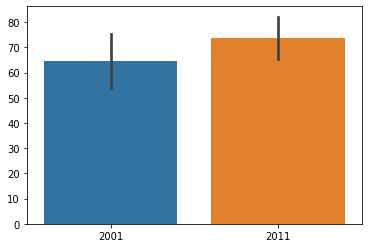

In [131]:
sns.barplot(data=df4)

## Long-form Data

In [132]:
# needs wide-form data to be converted to long-form data
df_melted=df4.melt(id_vars='KPI',value_vars=['2001','2011'],var_name='year',value_name='percentage')

**Referrences -**
- About Long & Wide form data - https://seaborn.pydata.org/tutorial/data_structure.html
- DataFrame.melt() - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html#pandas.DataFrame.melt

In [133]:
df_melted

,KPI,year,percentage
0,Literacy Rate (%),2001,64.80
1,Male Literacy Rate (%),2001,75.30
2,Female Literacy Rate (%),2001,53.70
3,Literacy Rate (%),2011,74.04
4,Male Literacy Rate (%),2011,82.14
5,Female Literacy Rate (%),2011,65.46


<AxesSubplot:xlabel='year', ylabel='percentage'>

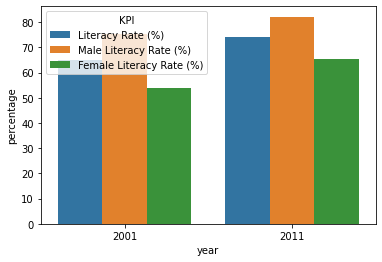

In [137]:
sns.barplot(data=df_melted,x='year',y='percentage',hue='KPI')

<AxesSubplot:xlabel='percentage', ylabel='year'>

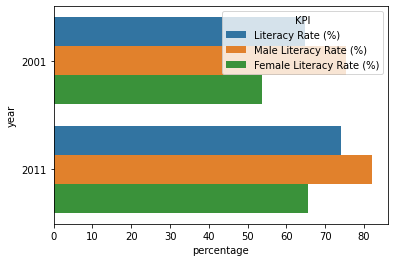

In [139]:
sns.barplot(data=df_melted,x='percentage',y='year',hue='KPI')

<AxesSubplot:xlabel='KPI', ylabel='percentage'>

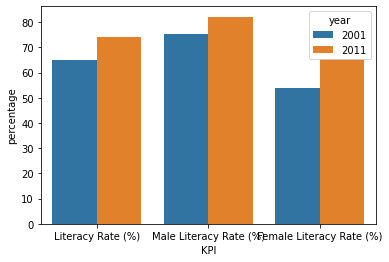

In [140]:
sns.barplot(data=df_melted,x='KPI',y='percentage',hue='year')

# Resume Parser

## Spacy Basics

### Importing spaCy

In [146]:
# Importing spacey
import spacy

# loading English language model
nlp=spacy.load('en_core_web_sm')

# below is the spacy recommended way

# import en_core_web_sm
# nlp=en_core_web_sm.load()

text='Hello World'

doc=nlp(text)
# You can directly provide the string in nlp like below
# doc=nlp('Hello World')

doc

Hello World

**Note:** The below also works but there is a difference.
Read more about it [here](https://stackoverflow.com/a/58234065)

`from spacey.lang.en import English`

`nlp=English()`

### Tokenization

In [147]:
# tokens are mostly words or puntuations

for token in doc:
    print(token)

Hello
World


### Lexical Attributes

In [151]:
text2='Google was initially funded by an August 1998 contribution of $100,000 from Andy Bechtolsheim, co-founder of Sun Microsystems'

doc2=nlp(text2)

# This will print all the part-of-speech of the tokens
for token in doc2:
    print(token.text+' : '+ token.pos_+' = '+ spacy.explain(token.pos_))

Google : PROPN = proper noun
was : AUX = auxiliary
initially : ADV = adverb
funded : VERB = verb
by : ADP = adposition
an : DET = determiner
August : PROPN = proper noun
1998 : NUM = numeral
contribution : NOUN = noun
of : ADP = adposition
$ : SYM = symbol
100,000 : NUM = numeral
from : ADP = adposition
Andy : PROPN = proper noun
Bechtolsheim : PROPN = proper noun
, : PUNCT = punctuation
co : NOUN = noun
- : NOUN = noun
founder : NOUN = noun
of : ADP = adposition
Sun : PROPN = proper noun
Microsystems : PROPN = proper noun


**Referrence**
- https://spacy.io/usage/spacy-101#annotations-pos-deps
- https://spacy.io/api/token#attributes
- https://pythonwife.com/lexical-attributes-in-spacy/

### Named Entites

In [157]:
doc3=nlp('Apple is looking at buying U.K. startup for $1 billion')
for ent in doc3.ents:
    print(ent.text+'\t'+ ent.label_+' : '+ spacy.explain(ent.label_))

Apple	ORG : Companies, agencies, institutions, etc.
U.K.	GPE : Countries, cities, states
$1 billion	MONEY : Monetary values, including unit


**Referrence**
- https://spacy.io/api/doc#ents
- https://spacy.io/usage/spacy-101#annotations-ner

## Resume Parsing

In [284]:
# importing required packages
import spacy # nlp
import pandas as pd # df and csv
import os # file path handling
import re # regular expresiion for pattern matching
from pdfminer.high_level import extract_text # pdf to text

**Note:** Before proceeding further, check in your **working directory** if these 3 filepaths are present
- outputs/txt
- outputs/csv
- resumes/

In [285]:
nlp=spacy.load('en_core_web_sm')

In [286]:
dict_vals={'names':[], 'emails':[], 'phone_nos':[], 'skill_sets':[]}
names=[]
emails=[]
phone_nos=[]
skill_sets=[]

In [287]:
def convert_pdf_to_text(resume_file_path):
    """
    Converts pdf file to text file and saves it in /outputs/txt/
    """
    temp_file_name=os.path.basename(resume_file_path)
    output_file_name=os.path.splitext(temp_file_name)[0]+'.txt'
    print(f'This will be the text file {output_file_name}...\n')
    output_file_path=os.path.join('outputs/txt/',output_file_name)
    print('Extracting File...\n')
    with open(output_file_path,'wt') as f:
        f.write(extract_text(resume_file_path))
    return output_file_path

In [288]:
def parse_text(text_to_parse):
    """
    Parses text and stores name in names list, emails in emails list, phone numbers in phone_nos list
    and unique skills in skill_sets list.
    
    So make sure to create these 4 lists.
    """
    print('Parsing the file...\n')
    doc=nlp(text_to_parse)
    name=[ent.text for ent in doc.ents if ent.label_=="PERSON"][0]
    print(name)
    print('\n')
    email=[token.text for token in doc if token.like_email==True][0]
    print(email)
    print('\n')
    
    # Phone number
    phone=re.findall('(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})'
                     , text_to_parse.lower())
    # The pattern is from https://stackoverflow.com/a/3868861
    
    # Skills
    skills=re.findall('java|python|html|css|sql|hadoop|tableau', text_to_parse.lower())
    # since there might be duplicate strings for skills in both skills section and project section or courses section
    # in the resume, so set() method is used to remove duplicate strings 
    skill_set=str(set(skills))
    
    names.append(name)
    emails.append(email)
    phone_nos.append(phone)
    skill_sets.append(skill_set)

In [289]:
for file in os.listdir(path='resumes/'):
    if file.endswith('.pdf'):
        print(f'{file} found...\n')
        output_file_loc=convert_pdf_to_text(os.path.join("resumes/",file))
        print('Extraction Completed...\n')
        with open(output_file_loc,'rt') as f:
            parse_text(f.read())
        print('Parsing completed...\n')

Alisson ParkerCV.pdf found...

This will be the text file Alisson ParkerCV.txt...

Extracting File...

Extraction Completed...

Parsing the file...

Alisson Parker-Wright                                                                                                 
alli1414parks@mail.com
Parsing completed...

John DominicCV.pdf found...

This will be the text file John DominicCV.txt...

Extracting File...

Extraction Completed...

Parsing the file...

John Dominic
johndominic@mail.com
Parsing completed...

AshleyMilesCV.pdf found...

This will be the text file AshleyMilesCV.txt...

Extracting File...

Extraction Completed...

Parsing the file...

Ashley Miles
ashleymiles@memail.com
Parsing completed...



In [290]:
dict_vals['names']=names
dict_vals['emails']=emails
dict_vals['phone_nos']=phone_nos
dict_vals['skill_sets']=skill_sets

In [291]:
df=pd.DataFrame(dict_vals)

In [292]:
df

,names,emails,phone_nos,skill_sets
0,Alisson Parker-Wright ...,alli1414parks@mail.com,[8569878511],"{'tableau', 'python', 'java'}"
1,John Dominic,johndominic@mail.com,[7877756411],"{'python', 'java', 'hadoop'}"
2,Ashley Miles,ashleymiles@memail.com,[6592251422],"{'tableau', 'sql'}"


In [293]:
df.to_csv('outputs/csv/parsed_resumes.csv')

# Image Converter

In [332]:
from PIL import Image
import glob

print(glob.glob("*.png"))

for file in glob.glob("*.png"):
    with Image.open(file) as img:
        rgb_img=img.convert('RGB')
        rgb_img.save(file.replace('png','jpg'), quality=95)

['1627926148815.png', 'download.png', '1627935452876.png']


**Referrence-https://stackoverflow.com/a/43258974/5086335**

# News Summarizer

## Importing Packages

In [1]:
from bs4 import BeautifulSoup
from requests import get
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [128]:
def get_news_content():
    try:
        response=get(input("Please enter the Wiki News URL: "))
        if response.status_code != 200:
            raise RuntimeError("Invalid URL")
        soup=BeautifulSoup(response.content,"lxml")
        text=''.join(map(lambda p : p.text,soup.find_all('p')))
        title=soup.title.text.split(' - ')[0]
#         print(text)
        return title, text
    except:
        print("Couldn't get the news. Please check and enter a valid URL")

In [40]:
text=get_news_content()

Please enter the Wiki News URL: https://en.wikinews.org/wiki/New_Zealand_raises_interest_rates_in_second_straight_month_to_0.75%25


In [46]:
print('News Title: '+text[0])

News Title: New Zealand raises interest rates in second straight month to 0.75%


In [48]:
print("No. of words in original article: "+str(len(str.split(text[1]))))

No. of words in original article: 812


## Summarizing

In [145]:
print("Title: "+text[0])
print("Summary: ")
print(summarize(text[1],word_count=100))

Title: New Zealand raises interest rates in second straight month to 0.75%
Summary: 
The Reserve Bank of New Zealand (RBNZ) raised interest rates by 25 basis points to 0.75% during its last policy meeting of the year yesterday, after the rate of consumer price inflation was recorded at 4.9% in the third quarter, the highest since December 2007.
Reuters reports the New Zealand dollar fell 0.6% due to some investors predicting a higher hike, and both 2- and 10-year government bonds slipped by 10 basis points each.


In [144]:
print("Title: "+text[0])
print("Summary: ")
print(summarize(text[1],ratio=0.25))

Title: New Zealand raises interest rates in second straight month to 0.75%
Summary: 
The Reserve Bank of New Zealand (RBNZ) raised interest rates by 25 basis points to 0.75% during its last policy meeting of the year yesterday, after the rate of consumer price inflation was recorded at 4.9% in the third quarter, the highest since December 2007.
The hike to the national official cash rate (OCR) was widely expected by economists and the markets alike: 21 of the 23 economists surveyed in a November 15-19 Reuters poll predicted an increase of 25 basis points, while the other two projected an increase by 50 basis points, to 1%.
While countries globally are winding down pandemic-related stimulus measures, according to Reuters, there has been pushback from some countries when it comes to raising interest rates: in the United States, the inflation rate recently rose to 6.2%, the highest in 31 years, which has led some economists to put pressure on Federal Reserve chair Jerome Powell to acceler

In [69]:
print("No. of words using word count: " + str(len(str.split(summarize(repr(text[1]),word_count=100)))))
print("No. of words using ratios: " + str(len(str.split(summarize(repr(text[1]),ratio=0.25)))))

No. of words using word count: 141
No. of words using ratios: 261


## Keywords

In [71]:
print('Keywords:')
print(keywords(text[1],ratio=0.25,lemmatize=True))

Keywords:
rate
reuters
according
priced
stimulus
rises
including
economist
told
zealand
bonds
rbnz
years
banks
house
hikes
investors
orr
governor
debt
taxes
tightening
reserve
predicting
senior market
nations
measures
recently
central
yesterday
rba
inflation
level
high
leverage
ecb
ben
businesses
chief
reports
forecasted
initially
jerome
michael
huge
economics


**Referrence for the above projects:** https://github.com/amrrs/build_tools_to_automate_python

# Summarization with spaCy

In [156]:
# Importing Packages
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

# Loading model
nlp=spacy.load('en_core_web_sm')

In [100]:
print(list(STOP_WORDS))

['along', 'former', 'against', 'another', 'quite', 'were', 'hundred', 'mostly', 'being', 'that', 'would', 'sometimes', 'when', '’s', 'please', 'to', 'say', 'thru', 'neither', 'not', 'nothing', '’re', 'somewhere', 'someone', 'around', 'until', 'much', 'did', 'or', 'is', 'amount', 'never', 'the', '‘d', 'up', 'whose', 'whatever', 'becoming', 'therein', 'does', 'cannot', 'whereby', 'see', 'whence', '’ve', 'ever', 'full', 'whereafter', 'toward', 'himself', 'him', 'both', 'been', 'eight', 'beforehand', 'using', 'used', '’ll', 'behind', 'everyone', 'from', 'side', 'namely', 'three', 'themselves', 'without', 'enough', 'among', 'must', 'below', 'last', 'front', 'on', 'get', 'can', 'once', "n't", 'yet', '’m', 'beside', 'latterly', 'other', 'becomes', 'doing', 'meanwhile', 'out', 'seem', 'well', 'each', 'amongst', 'hereby', 'an', 'else', 'always', 'take', 'down', 'herself', 'although', 'various', 'with', 'less', 'though', 'you', 'all', 'also', 'others', 'therefore', 'ca', 'might', 'at', 'myself',

In [101]:
print(list(punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


**I have used the same function defined in the News Summarizer**

In [176]:
text=get_news_content()

Please enter the Wiki News URL: https://en.wikinews.org/wiki/Indian_Prime_Minister_Narendra_Modi_promises_repeal_of_three_farm_laws


In [177]:
doc=nlp(text[1])

## Number of appearances a word makes in the document
**Required for calculating sentence score**

In [178]:
word_frequencies={}
for word in doc:
    if word.lower_ not in STOP_WORDS:
        if word.lower_ not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text]=1
            else:
                word_frequencies[word.text]=word_frequencies[word.text]+1

In [179]:
print(word_frequencies)

{'Monday': 1, 'November': 1, '22': 1, '2021': 1, '\xa0\n': 1, 'address': 1, 'nation': 1, 'Friday': 1, 'Indian': 5, 'Prime': 1, 'Minister': 1, 'Narendra': 1, 'Modi': 2, 'pledged': 1, 'repeal': 3, 'controversial': 1, 'farm': 2, 'laws': 5, 'explaining': 1, 'decided': 1, 'start': 1, 'constitutional': 1, 'process': 1, 'upcoming': 1, 'parliament': 3, 'sessions': 1, 'starts': 1, 'end': 1, 'month': 1, '\n': 5, 'September': 1, '2020': 3, 'President': 1, 'Ram': 1, 'Nath': 1, 'Kovind': 1, 'assented': 1, 'farming': 1, 'passed': 2, 'Parliament': 1, 'Collectively': 1, 'known': 1, 'agriculture': 1, 'acts': 1, 'Farmers': 3, 'Produce': 1, 'Trade': 1, 'Commerce': 1, 'Promotion': 1, 'Facilitation': 1, 'Bill': 3, 'Empowerment': 1, 'Protection': 1, 'Agreement': 1, 'Price': 2, 'Assurance': 1, 'Farm': 1, 'Services': 1, 'Essential': 1, 'Commodities': 1, 'Amendment': 1, 'bills': 2, 'monsoon': 1, 'session': 1, 'farmers': 6, 'Punjab': 1, 'Haryana': 1, 'protested': 1, 'reforms': 1, 'expressing': 1, 'strong': 1, '

In [180]:
max_frequency=max(word_frequencies.values())

In [181]:
print(max_frequency)

6


In [182]:
for word in word_frequencies.keys():
    word_frequencies[word]=word_frequencies[word]/max_frequency

In [183]:
print(word_frequencies)

{'Monday': 0.16666666666666666, 'November': 0.16666666666666666, '22': 0.16666666666666666, '2021': 0.16666666666666666, '\xa0\n': 0.16666666666666666, 'address': 0.16666666666666666, 'nation': 0.16666666666666666, 'Friday': 0.16666666666666666, 'Indian': 0.8333333333333334, 'Prime': 0.16666666666666666, 'Minister': 0.16666666666666666, 'Narendra': 0.16666666666666666, 'Modi': 0.3333333333333333, 'pledged': 0.16666666666666666, 'repeal': 0.5, 'controversial': 0.16666666666666666, 'farm': 0.3333333333333333, 'laws': 0.8333333333333334, 'explaining': 0.16666666666666666, 'decided': 0.16666666666666666, 'start': 0.16666666666666666, 'constitutional': 0.16666666666666666, 'process': 0.16666666666666666, 'upcoming': 0.16666666666666666, 'parliament': 0.5, 'sessions': 0.16666666666666666, 'starts': 0.16666666666666666, 'end': 0.16666666666666666, 'month': 0.16666666666666666, '\n': 0.8333333333333334, 'September': 0.16666666666666666, '2020': 0.5, 'President': 0.16666666666666666, 'Ram': 0.1

In [184]:
sent_list=[sent for sent in doc.sents]

**A list of sentences in a document**

In [185]:
print(sent_list)

[Monday, November 22, 2021 
In an address to the nation on Friday, Indian Prime Minister Narendra Modi pledged to repeal three controversial farm laws, explaining "we have decided to repeal all three farm laws and will start the constitutional process to repeal all the three laws in the upcoming parliament sessions that starts at the end of this month"., 
In September 2020, President Ram Nath Kovind assented to three farming laws passed by the Parliament., Collectively known as the 2020 Indian agriculture acts, they were the Farmers' Produce Trade and Commerce (Promotion and Facilitation) Bill, Farmers (Empowerment and Protection) Agreement on Price Assurance and Farm Services Bill, and Essential Commodities (Amendment) Bill., 
The bills were passed by the Indian parliament during the monsoon session of 2020., Some farmers in Punjab and Haryana protested the reforms, expressing strong apprehension and criticism that the new laws would disrupt the Minimum Support Price system and leave 

In [186]:
sentence_score={}

## Sentence score = Sum of Word frequencies in the sentence

In [187]:
for sent in sent_list:
    for word in sent:
        if word.text in word_frequencies.keys():
            if sent not in sentence_score.keys():
                sentence_score[sent]=word_frequencies[word.text]
            else:
                sentence_score[sent]+=word_frequencies[word.text]

In [188]:
print(sentence_score)

{Monday, November 22, 2021 
In an address to the nation on Friday, Indian Prime Minister Narendra Modi pledged to repeal three controversial farm laws, explaining "we have decided to repeal all three farm laws and will start the constitutional process to repeal all the three laws in the upcoming parliament sessions that starts at the end of this month".: 10.166666666666664, 
In September 2020, President Ram Nath Kovind assented to three farming laws passed by the Parliament.: 3.833333333333333, Collectively known as the 2020 Indian agriculture acts, they were the Farmers' Produce Trade and Commerce (Promotion and Facilitation) Bill, Farmers (Empowerment and Protection) Agreement on Price Assurance and Farm Services Bill, and Essential Commodities (Amendment) Bill.: 7.166666666666668, 
The bills were passed by the Indian parliament during the monsoon session of 2020.: 3.6666666666666665, Some farmers in Punjab and Haryana protested the reforms, expressing strong apprehension and critici

**IMPORTANT NOTE:**
`sent_list` is the list of all the sentences inside the document and the below code selects 25%(which will be a whole number) of its length to disply as summary

In [189]:
# selecting quantity the summary, in this case 25%
summary_quantity=int(len(sent_list)*0.25)

In [190]:
print(summary_quantity)

3


**Referrence for nlargest method**
https://pythontic.com/algorithms/heapq/nlargest

In [191]:
# nlargest takes 3 arguments
# Returns 'n' number of elements(1st argument) from the list of the elements(2nd argument) sorted in descending order
# with the help of a key function(3rd argument) that returns a comparison key to be used in the sorting.
summary=nlargest(summary_quantity,sent_list,key=sentence_score.get)

In [192]:
summary

[Monday, November 22, 2021 
 In an address to the nation on Friday, Indian Prime Minister Narendra Modi pledged to repeal three controversial farm laws, explaining "we have decided to repeal all three farm laws and will start the constitutional process to repeal all the three laws in the upcoming parliament sessions that starts at the end of this month".,
 While farmers were seen celebrating after the decision of the government near the Ghazipur border, Bharatiya Kisan Union (Indian Farmers' Union) leader Rakesh Tikait declared that the farmers would continue the protests until the bills have been completely scrapped in the parliament.,
 Collectively known as the 2020 Indian agriculture acts, they were the Farmers' Produce Trade and Commerce (Promotion and Facilitation) Bill, Farmers (Empowerment and Protection) Agreement on Price Assurance and Farm Services Bill, and Essential Commodities (Amendment) Bill.]

In [193]:
final_summary=[paragraph.text for paragraph in summary]
summary=''.join(final_summary)

In [194]:
print('Title: '+str(text[0]))
print('Summary: '+summary)

Title: Indian Prime Minister Narendra Modi promises repeal of three farm laws
Summary: Monday, November 22, 2021 
In an address to the nation on Friday, Indian Prime Minister Narendra Modi pledged to repeal three controversial farm laws, explaining "we have decided to repeal all three farm laws and will start the constitutional process to repeal all the three laws in the upcoming parliament sessions that starts at the end of this month".While farmers were seen celebrating after the decision of the government near the Ghazipur border, Bharatiya Kisan Union (Indian Farmers' Union) leader Rakesh Tikait declared that the farmers would continue the protests until the bills have been completely scrapped in the parliament.Collectively known as the 2020 Indian agriculture acts, they were the Farmers' Produce Trade and Commerce (Promotion and Facilitation) Bill, Farmers (Empowerment and Protection) Agreement on Price Assurance and Farm Services Bill, and Essential Commodities (Amendment) Bill.


**Referrence-https://youtu.be/5mY6a3QbIXM**